Overall Comments - M. Schuckers
10 June 2025

1. Put comments into both Markdown between Python cells and within the Python cells
2. You might want to make a version of the data with just the features/variables that are used in the module or maybe have some extras.
3. I would put all of the markdown and python in a single file rather than having two
4. You'll probably need a discussion about why you're using log purse as the target/response
5. I would put the F-statistic into terms about the p-value rather than the value of the F-statistic
6. Do we want to talk about centering of features?
7. Note that the first residual plot does have some non-constant variability.
8. Why do the test/train split if you're not going to use it
9. In the residual plot that you've given talk more about what randomly scattered means.
10. I would add a task at the end to interpret the estimated coefficients.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
import scipy.stats as st
import statsmodels.api as sm 
import pylab as py 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [8]:
boxing = pd.read_csv("https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/refs/heads/main/Boxing_Pay_data%20(1).csv", na_values=['?'])
boxing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4670 entries, 0 to 4669
Data columns (total 27 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Boxer      4670 non-null   object 
 1   Date       4670 non-null   object 
 2   Venue      4670 non-null   object 
 3   Purse      4670 non-null   float64
 4   lnRPurse   4670 non-null   float64
 5   weight     4670 non-null   float64
 6   Age        4670 non-null   float64
 7   Wins       4670 non-null   int64  
 8   Losses     4670 non-null   int64  
 9   KO         4670 non-null   int64  
 10  W-Title    4670 non-null   int64  
 11  PPV        4670 non-null   int64  
 12  ESPN       4670 non-null   int64  
 13  HBO        4670 non-null   int64  
 14  FOX        4670 non-null   int64  
 15  TopRank    4670 non-null   int64  
 16  GoldenBoy  4670 non-null   int64  
 17  RDS        4670 non-null   int64  
 18  Y2009      4670 non-null   int64  
 19  Y2010      4670 non-null   int64  
 20  Y2011   

Multiple Linear Regression is a statistical technique used to predict the value of a response (dependent) variable using two or more predictor (independent) variables.

- The General Formula
​$$ Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_p X_p + \epsilon$$




Let's build a multiple regression model predicting lnRPurse (log of fighter earnings) based on several predictors such as Age, Wins, and W-Title

In [20]:
df = boxing

# Drop rows with missing values in relevant columns
df = df[['lnRPurse', 'Age', 'Wins', 'KO', 'W-Title']].dropna()

# Define X and y
X = df[['Age', 'Wins', 'KO', 'W-Title']]
y = df['lnRPurse']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Fit model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

RMSE (Root Mean Squared Error) tells us how far off our model's predictions are, on average, in the same units as the response variable.

In [15]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse:.3f}")

RMSE: 0.850


On average, the predicted log earnings are off by about 0.85 units from the actual log earnings.

Linear Regression Model Summary 

| Label | Meaning |
|--------------------|-----------------------------------------------------------------------------|
| Dep. Variable              |  This is the variable you're trying to predict: lnRPurse (log of fighter's earnings/purse).                                            |
| R-squared               | 0.700 → 70% of the variation in lnRPurse can be explained by the model.                                            |
| Adj. R-squared             | Adjusted for number of predictors; still 0.699, which means no overfitting                                       |
| F-statistic             | A test for overall significance. Value is very high (2717), indicating the model is useful.                                 |

In [21]:
x2 = sm.add_constant(X)

#fit linear regression model
model2 = sm.OLS(y, x2).fit()

#view model summary
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:               lnRPurse   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     2717.
Date:                Sat, 31 May 2025   Prob (F-statistic):               0.00
Time:                        17:41:11   Log-Likelihood:                -6153.4
No. Observations:                4670   AIC:                         1.232e+04
Df Residuals:                    4665   BIC:                         1.235e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7036      0.080     96.114      0.0

Variables:
- const: The y-intercept when all variables = 0 → 7.7036

- Age: Each year of age decreases log earnings slightly (-0.0136) → older fighters earn less.

- Wins: Each win adds 0.0837 to log earnings → winning increases purse.

- KO: Each knockout adds 0.019 → smaller effect than wins but still positive.

- W-Title: Having a world title adds 1.96, a major boost to earnings.

### Residual Plot ###

#### What are residuals? ####

Residuals are the differences between actual values and predicted values:

Residual=Actual Value−Predicted Value

A residual plot shows prediction errors. Ideally, they should be randomly scattered, which indicates the model fits well.

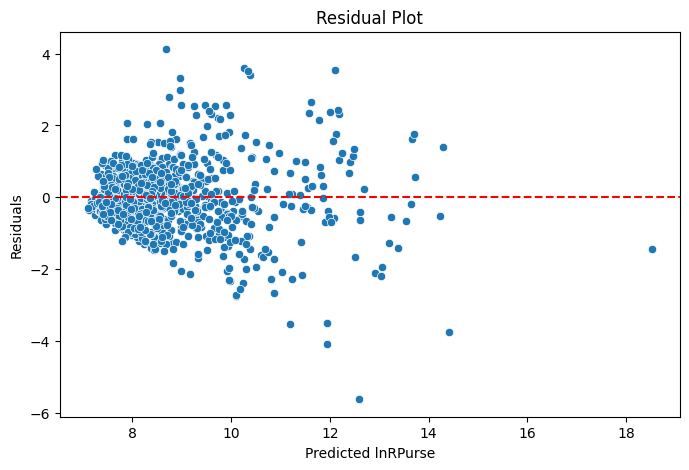

In [16]:
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, linestyle='--', color='red')
plt.xlabel("Predicted lnRPurse")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The red line is called the zero-residual line. It shows where the model's predictions are exactly correct — meaning the predicted value perfectly matches the actual value.

### Activity ###
1. Now build a model predicting lnRPurse using weight, RDS, W-Title, and Wins. Print a model summary as well. 
2. Calculate the RMSE, then explain what it means in the context of the data. 
3. Create a residual plot for your model, explain what it shows in the context of the data?
4. Which of these residual plots best shows a well-fit linear model?

**A.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_A.png" width="400"/>

**B.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_B.png" width="400"/>

**C.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_C.png" width="400"/>

**D.**
<img src="https://raw.githubusercontent.com/izaan-khudadad/Boxing_Fighter_Pay/main/residual_plot_D.png" width="400"/>
